# Analyzing control data

<br>

**Language: R**

This notebook provides the code for the descriptive analysis and visualization of the control data. See dissertation Chapter 5 for details.

**Notebook contents:**
- [Initial setup](#Initial-setup)
- [Original scores by CEFR level and text type](#Original-scores-by-CEFR-level-and-text-type)
- [Fair scores by intended CEFR level and text type](#Fair-scores-by-CEFR-level-and-text-type)

## Data preparation

In [1]:
# Set notebook preferences

options(repr.matrix.max.cols=50, repr.matrix.max.rows=100) 

In [2]:
# Load libraries

library(lme4)
library(ggplot2)
library(magrittr)
library(RColorBrewer)

Loading required package: Matrix



In [3]:
# Read in control dataframe

control <- read.csv(file="../docs/control_R.csv", header=TRUE, sep=",")
head(control)
nrow(control)

,type,text_id,rater_id,CEFR,TR,CC,LR,GRA,TR_fair,CC_fair,LR_fair,GRA_fair,overall,overall_fair,text_len,MLC,CNC,vocD,AG,bigram_range,mean_MI,mean_tscore,absent_prop,col_errors_per_100,correct_cols_per_100,K1to2_p,K3to9_p,K10to16_p
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,base,Text1,R1,B1,4,4,4,3,4,4,5,4,3.5,4.0,250,6.436,0.667,48.559,0.379,0.094,2.526,106.160,0.987,7.20,4.800,0.75,0.25,0
2,base,Text1,R40,B1,5,5,5,5,4,4,5,4,5.0,4.0,250,6.436,0.667,48.559,0.379,0.094,2.526,106.160,0.987,7.20,4.800,0.75,0.25,0
3,base,Text1,R19,B1,5,5,6,5,4,4,5,4,5.0,4.0,250,6.436,0.667,48.559,0.379,0.094,2.526,106.160,0.987,7.20,4.800,0.75,0.25,0
4,base,Text1,R11,B1,5,4,5,5,4,4,5,4,4.5,4.0,250,6.436,0.667,48.559,0.379,0.094,2.526,106.160,0.987,7.20,4.800,0.75,0.25,0
5,orig,IELTS_B1,IELTS,B1,4,4,4,4,4,4,4,4,4.0,4.0,172,6.615,0.615,47.870,0.381,0.088,2.429,115.839,0.979,8.14,4.651,0.75,0.25,0
6,norm,Text31,R34,B1,5,5,5,4,5,4,5,4,4.5,4.5,250,6.410,0.641,48.723,0.379,0.095,2.522,111.672,0.985,8.00,4.800,0.75,0.25,0


[1] 27

## Original scores by CEFR level and text type

Create charts for the original overall scores (average of the four bands) and for each original analytic band.

Bar chart:
- x axis = CEFR level (B1, B2, C1), nested type (orig, norm, base)
- y axis = overall score 1 to 9

Purpose: show similarity of scores for each CEFR level, regardless of type

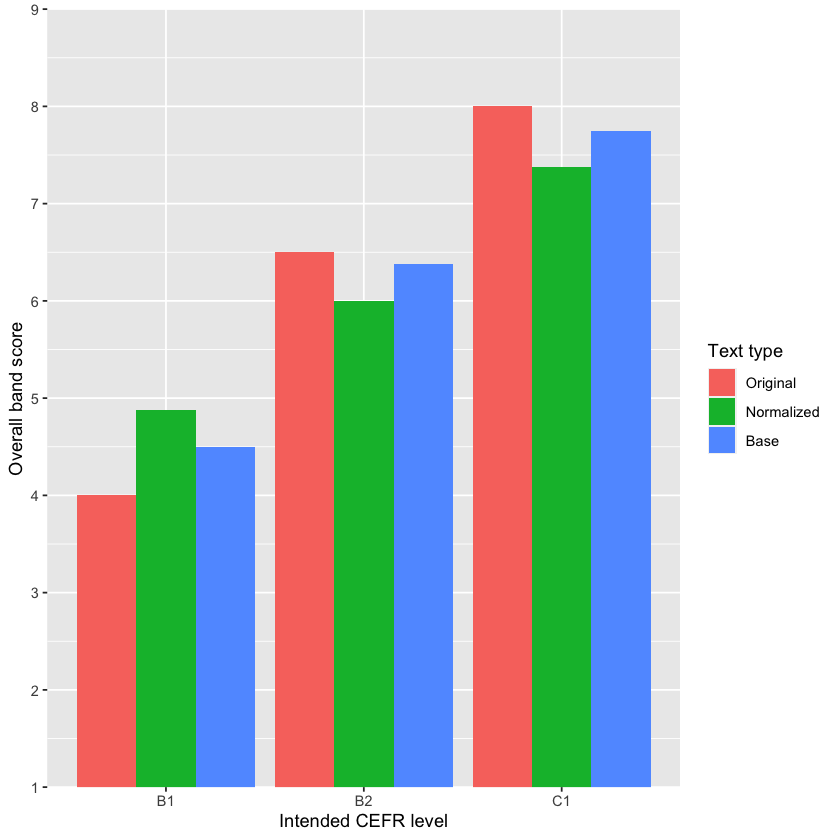

In [4]:
# Create plot

control$type <- factor(control$type,levels = c("orig", "norm", "base")) # Set factor order

ggplot(control, aes(fill=type, y=overall, x=CEFR)) + 
    geom_bar(position="dodge", stat = "summary", fun = "mean") +
    coord_cartesian(ylim = c(1, 9)) +
    scale_y_continuous(breaks = seq(1, 9, len = 9),expand = c(0,0)) + 
    labs(x ="Intended CEFR level", y = "Overall band score", fill = 'Text type') +
    scale_fill_discrete(labels=c("Original", "Normalized", "Base"))

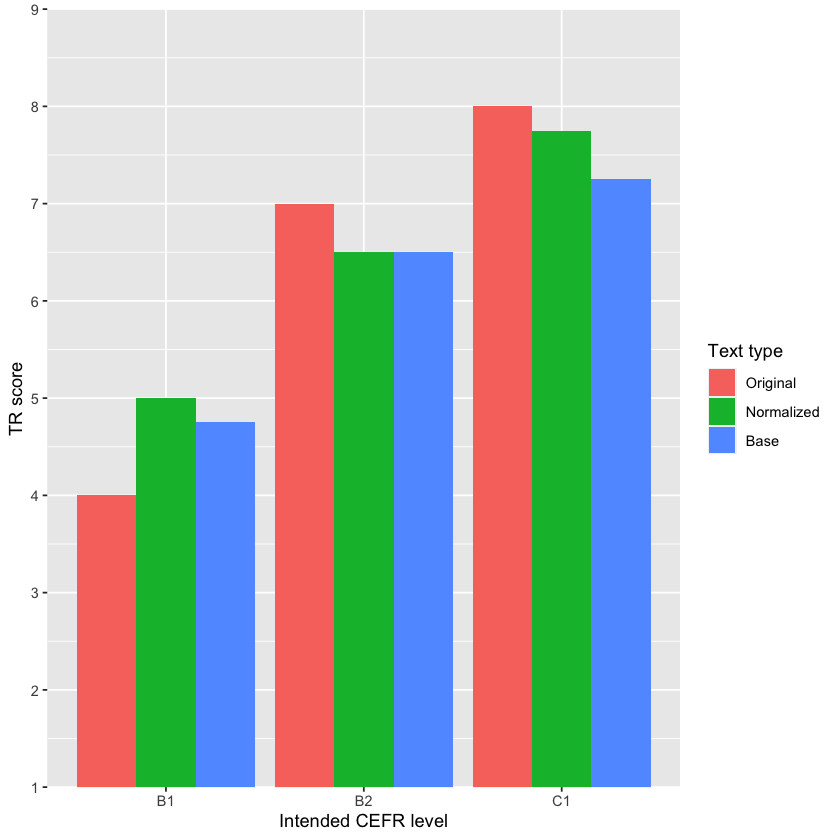

In [5]:
# Same as above but with TR

ggplot(control, aes(fill=type, y=TR, x=CEFR)) + 
    geom_bar(position="dodge", stat = "summary", fun = "mean") +
    coord_cartesian(ylim = c(1, 9)) +
    scale_y_continuous(breaks = seq(1, 9, len = 9),expand = c(0,0)) + 
    labs(x ="Intended CEFR level", y = "TR score", fill = 'Text type') +
    scale_fill_discrete(labels=c("Original", "Normalized", "Base"))

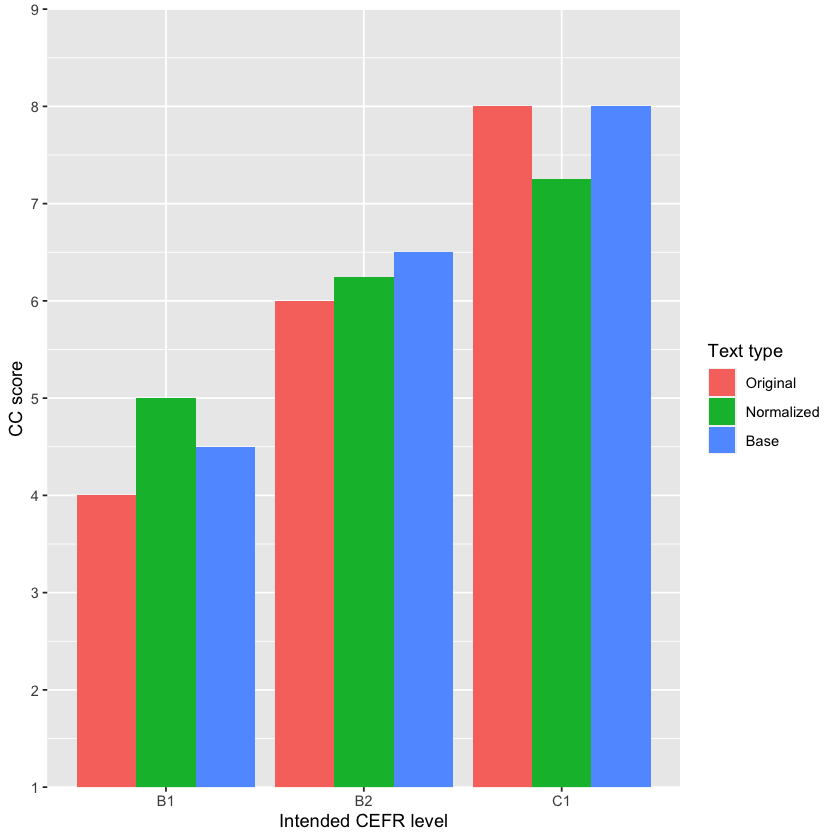

In [6]:
# Same as above but with CC

ggplot(control, aes(fill=type, y=CC, x=CEFR)) + 
    geom_bar(position="dodge", stat = "summary", fun = "mean") +
    coord_cartesian(ylim = c(1, 9)) +
    scale_y_continuous(breaks = seq(1, 9, len = 9),expand = c(0,0)) + 
    labs(x ="Intended CEFR level", y = "CC score", fill = 'Text type') +
    scale_fill_discrete(labels=c("Original", "Normalized", "Base"))

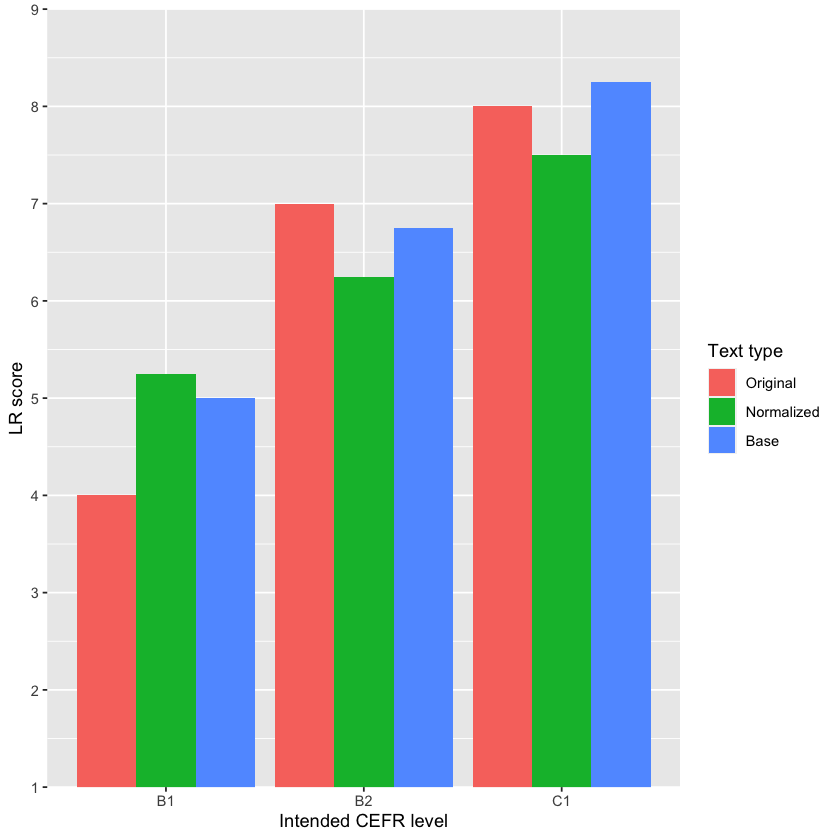

In [7]:
# Same as above but with LR

ggplot(control, aes(fill=type, y=LR, x=CEFR)) + 
    geom_bar(position="dodge", stat = "summary", fun = "mean") +
    coord_cartesian(ylim = c(1, 9)) +
    scale_y_continuous(breaks = seq(1, 9, len = 9),expand = c(0,0)) + 
    labs(x ="Intended CEFR level", y = "LR score", fill = 'Text type') +
    scale_fill_discrete(labels=c("Original", "Normalized", "Base"))

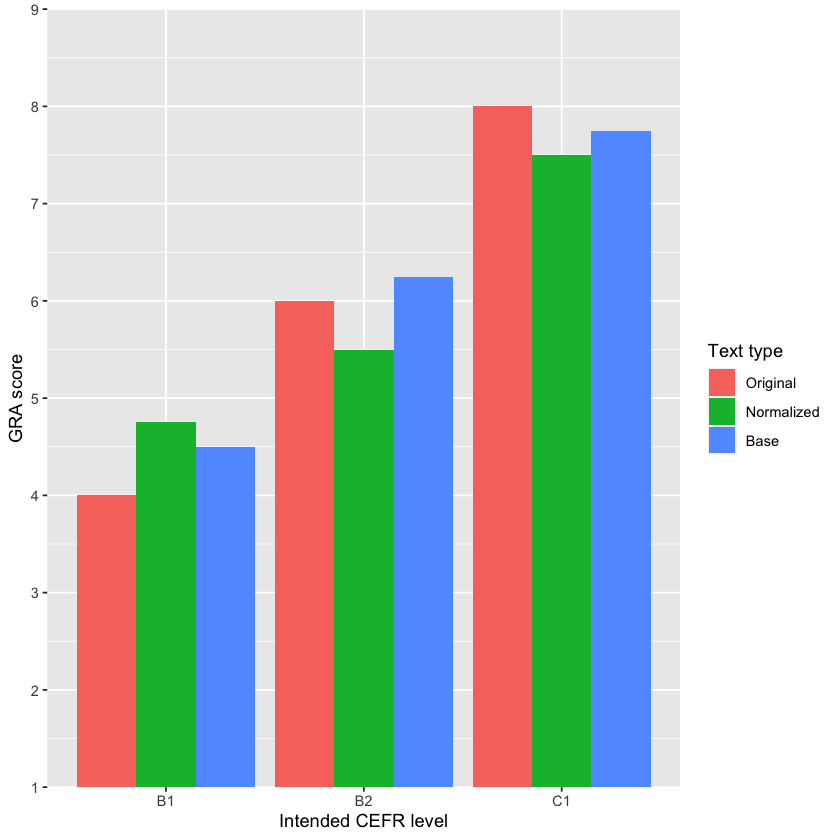

In [8]:
# Same as above but with GRA

ggplot(control, aes(fill=type, y=GRA, x=CEFR)) + 
    geom_bar(position="dodge", stat = "summary", fun = "mean") +
    coord_cartesian(ylim = c(1, 9)) +
    scale_y_continuous(breaks = seq(1, 9, len = 9),expand = c(0,0)) + 
    labs(x ="Intended CEFR level", y = "GRA score", fill = 'Text type') +
    scale_fill_discrete(labels=c("Original", "Normalized", "Base"))

## Fair scores by CEFR level and text type

Create charts for the fair overall scores (average of the four bands) and for each fair analytic band.

Bar chart:
- x axis = CEFR level (B1, B2, C1), nested type (orig, norm, base)
- y axis = overall score 1 to 9 (MFRM adjusted 'fair' scores)

Purpose: show similarity of scores for each CEFR level, regardless of type

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



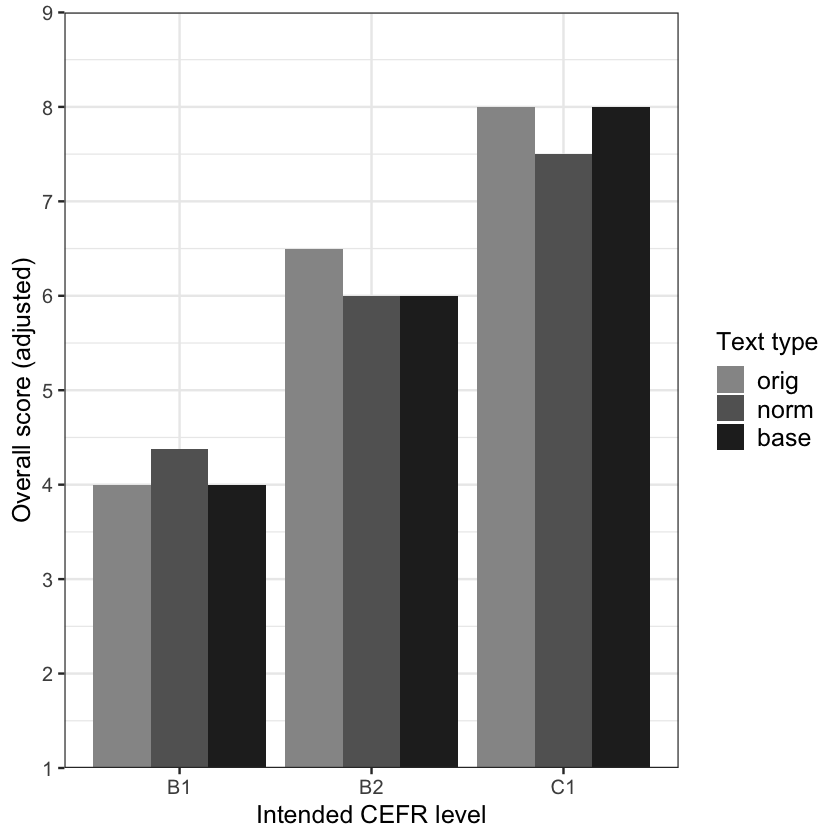

In [9]:
# Create plot

Overall_palette <- brewer.pal(name="Greys",n=5)[3:5]

ggplot(control, aes(fill=type, y=overall_fair, x=CEFR)) +
    geom_bar(position="dodge", stat = "summary", fun = "mean") +
    coord_cartesian(ylim = c(1, 9)) +
    scale_y_continuous(breaks = seq(1, 9, len = 9),expand = c(0,0)) + 
    labs(x ="Intended CEFR level", y = "Overall score (adjusted)", fill = 'Text type') +
    scale_fill_discrete(labels=c("Original", "Normalized","Base")) +
    scale_fill_manual(values = Overall_palette) + 
    theme_bw(base_size=15) + 
    theme(legend.text=element_text(size=15))

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”


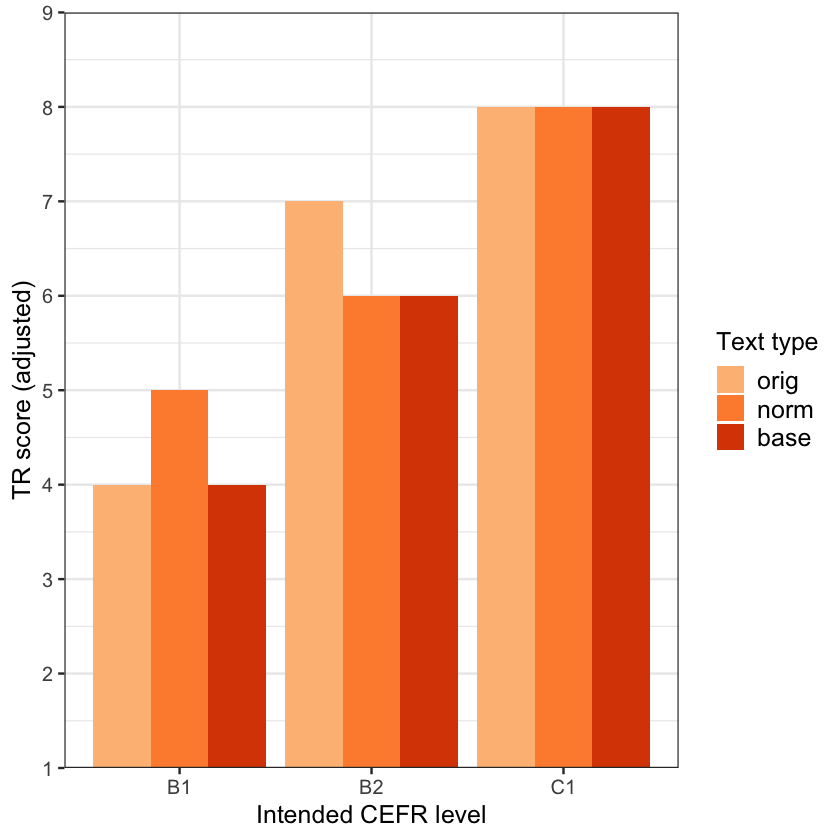

In [10]:
# Same as above but with TR Chapter 5

TR_palette <- brewer.pal(name="Oranges",n=4)[2:4]

ggplot(control, aes(fill=type, y=TR_fair, x=CEFR)) +
    geom_bar(position="dodge", stat = "summary", fun = "mean") +
    coord_cartesian(ylim = c(1, 9)) +
    scale_y_continuous(breaks = seq(1, 9, len = 9),expand = c(0,0)) + 
    labs(x ="Intended CEFR level", y = "TR score (adjusted)", fill = 'Text type') +
    scale_fill_discrete(labels=c("Original", "Normalized", "Base")) +
    scale_fill_manual(values = TR_palette) +
    theme_bw(base_size=15) + 
    theme(legend.text=element_text(size=15))

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



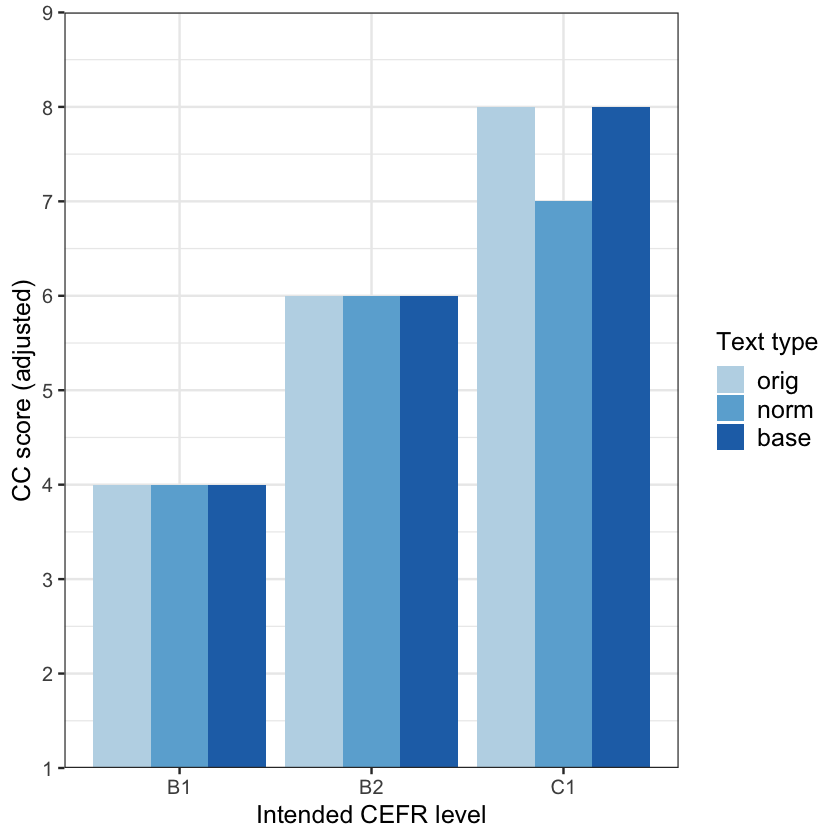

In [11]:
# Same as above but with CC

CC_palette <- brewer.pal(name="Blues",n=4)[2:4]

ggplot(control, aes(fill=type, y=CC_fair, x=CEFR)) +
    geom_bar(position="dodge", stat = "summary", fun = "mean") +
    coord_cartesian(ylim = c(1, 9)) +
    scale_y_continuous(breaks = seq(1, 9, len = 9),expand = c(0,0)) + 
    labs(x ="Intended CEFR level", y = "CC score (adjusted)", fill = 'Text type') +
    scale_fill_discrete(labels=c("Original", "Normalized", "Base")) +
    scale_fill_manual(values = CC_palette) +
    theme_bw(base_size=15) + 
    theme(legend.text=element_text(size=15))

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



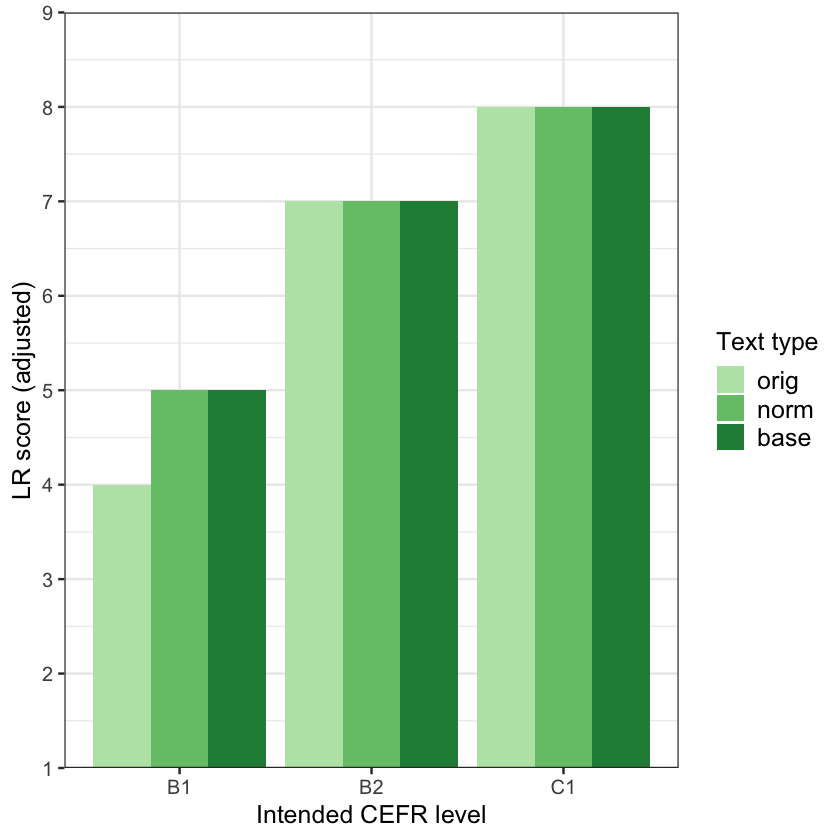

In [12]:
# Same as above but with LR

LR_palette <- brewer.pal(name="Greens",n=4)[2:4]

ggplot(control, aes(fill=type, y=LR_fair, x=CEFR)) +
    geom_bar(position="dodge", stat = "summary", fun = "mean") +
    coord_cartesian(ylim = c(1, 9)) +
    scale_y_continuous(breaks = seq(1, 9, len = 9),expand = c(0,0)) + 
    labs(x ="Intended CEFR level", y = "LR score (adjusted)", fill = 'Text type') +
    scale_fill_discrete(labels=c("Original", "Normalized", "Base")) +
    scale_fill_manual(values = LR_palette) +
    theme_bw(base_size=15) + 
    theme(legend.text=element_text(size=15))

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



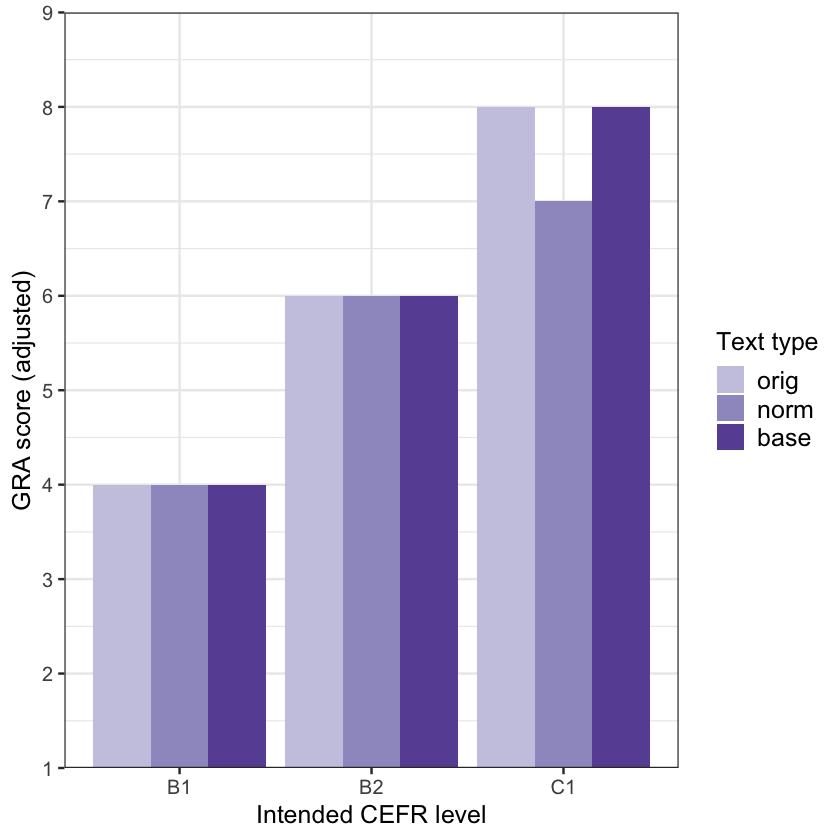

In [13]:
# Same as above but with GRA

GRA_palette <- brewer.pal(name="Purples",n=4)[2:4]

ggplot(control, aes(fill=type, y=GRA_fair, x=CEFR)) +
    geom_bar(position="dodge", stat = "summary", fun = "mean") +
    coord_cartesian(ylim = c(1, 9)) +
    scale_y_continuous(breaks = seq(1, 9, len = 9),expand = c(0,0)) + 
    labs(x ="Intended CEFR level", y = "GRA score (adjusted)", fill = 'Text type') +
    scale_fill_discrete(labels=c("Original", "Normalized", "Base")) +
    scale_fill_manual(values = GRA_palette) +
    theme_bw(base_size=15) + 
    theme(legend.text=element_text(size=15))

[Back to top](#Analyzing-control-data)